## 数据预处理

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
dpn = pd.read_excel('../input/DPN/10.25-DPN患者信息表.xlsx',sheet_name='总表')
dpn.loc[0,'分组（1=DPN组，0=非DPN组）'] = '分组'
dpn.columns = dpn.loc[0]
dpn.drop(index=0,axis=0,inplace=True)
dpn.reset_index(drop=True,inplace=True)
dpn.columns

Index(['分组', '流水号', '姓名', '病案号', '性别', '年龄', '入院日期', '身高', '体重', '病程',
       ...
       '游离前列腺特异抗原', '睾酮', '雌二醇', '促黄体生成素', '促卵泡成熟素', '孕酮', '血清泌乳素', 'NLR',
       'PLR', '胰岛素抵抗指数'],
      dtype='object', name=0, length=193)

In [2]:
pink = ['性别','年龄','身高','体重','糖尿病性肾病','糖尿病性视网膜病变','高脂血症','高血压','动脉粥样硬化','血常规_白细胞计数','血红蛋白','单核细胞绝对值','嗜酸性粒细胞绝对值','嗜碱性粒细胞绝对值','血小板平均体积','天冬氨酸氨基转移酶','丙氨酸氨基转移酶','白蛋白','总胆红素','尿素','肌酐','血清碳酸氢盐','尿酸','脂肪酶','总胆固醇','甘油三酯','高密度脂蛋白胆固醇','载脂蛋白A1','载脂蛋白B','载脂蛋白E','低密度脂蛋白胆固醇','脂蛋白a','糖化血清蛋白','糖化血红蛋白','促甲状腺激素','凝血酶原时间（PT）','活化部分凝血活酶时间（APTT）','白细胞','尿蛋白','葡萄糖','尿蛋白定量','24h尿蛋白定量','24小时尿量','餐后30分钟C肽','餐后30分钟胰岛素','餐后60分钟C肽','餐后60分钟胰岛素','餐后120分钟胰岛素','病程','C2/C0']
red = ['血小板','中性粒细胞绝对值','淋巴细胞绝对值','糖','空腹胰岛素']
end = ['NLR','PLR','胰岛素抵抗指数']
y = ['分组']
print(f'粉色的有:{len(pink)}列')
print(f'红色的有:{len(red)}列')
print(f'追加的有:{len(end)}列')

粉色的有:50列
红色的有:5列
追加的有:3列


In [3]:
zh2en = {
    '分组':'Category',
    '性别':'gender',
    '年龄':'age',
    '身高':'height',
    '体重':'weight',
    '糖尿病性肾病':'diabetic nephropathy',
    '糖尿病性视网膜病变':'diabetic retinopathy',
    '高脂血症':'hyperlipemia',
    '高血压':'hypertension',
    '动脉粥样硬化':'atherosclerosis',
    '血常规_白细胞计数':'white blood cell count',
    '血红蛋白':'hemoglobin',
    '单核细胞绝对值':'Monocyte absolute values',
    '嗜酸性粒细胞绝对值':'Eosinophils absolute value',
    '嗜碱性粒细胞绝对值':'Basophils absolute value',
    '血小板平均体积':'mean platelets volume',
    '天冬氨酸氨基转移酶':'aspartate transaminase',
    '丙氨酸氨基转移酶':'alanine aminotransferase',
    '白蛋白':'albumin',
    '总胆红素':'total bilirubin',
    '尿素':'urea',
    '肌酐':'creatinine',
    '血清碳酸氢盐':'Serum bicarbonate',
    '尿酸':'Uric Acid',
    '脂肪酶':'lipase',
    '总胆固醇':'total cholesterol',
    '甘油三酯':'triglyceride',
    '高密度脂蛋白胆固醇':'hdl-cholesterol',
    '载脂蛋白A1':'Apolipoprotein A1',
    '载脂蛋白B':'Apolipoprotein B',
    '载脂蛋白E':'Apolipoprotein E',
    '低密度脂蛋白胆固醇':'LDL Cholesterol',
    '脂蛋白a':'Lipoprotein a',
    '糖化血清蛋白':'glycated serum protein',
    '糖化血红蛋白':'glycosylated hemoglobin',
    '促甲状腺激素':'thyrotropic hormone',
    '凝血酶原时间（PT）':'prothrombin time',
    '活化部分凝血活酶时间（APTT）':'activated partial thromboplastin time',
    '白细胞':'leucocyte',
    '尿蛋白':'urine protein',
    '葡萄糖':'glucose',
    '尿蛋白定量':'urine protein quantity',
    '24h尿蛋白定量':'24h urine protein quantity',
    '24小时尿量':'24-hour urine output',
    '餐后30分钟C肽':'C-peptide 30 minutes after meal',
    '餐后30分钟胰岛素':'Insulin 30 minutes after a meal',
    '餐后60分钟C肽':'C-peptide 60 minutes after a meal',
    '餐后60分钟胰岛素':'Insulin 60 minutes after a meal',
    '餐后120分钟胰岛素':'Insulin 120 minutes after a meal',
    '病程':'Diabetes duration',
    'C2/C0':'C2/C0',
    'NLR':'NLR',
    'PLR':'PLR',
    '胰岛素抵抗指数':'HOMA-IR'
}

In [4]:
dpn = dpn[y+pink+end]
dpn.replace('-----',np.nan,inplace=True)
dpn.replace('/',np.nan,inplace=True)
dpn.rename(columns=zh2en,inplace=True)
dpn.columns
dpn['height']=dpn['height'].copy().replace('未测',np.nan)
dpn['weight']=dpn['weight'].copy().replace('未测',np.nan)
# dpn.head()

In [5]:
dpn.drop(columns=[zh2en['餐后30分钟C肽'],zh2en['餐后30分钟胰岛素']],inplace=True)
dpn.drop(columns=[zh2en['餐后60分钟C肽'],zh2en['餐后60分钟胰岛素'],zh2en['糖化血清蛋白'],zh2en['脂蛋白a'],zh2en['载脂蛋白E'],zh2en['载脂蛋白B'],zh2en['载脂蛋白A1'],zh2en['餐后120分钟胰岛素']],inplace=True)
dpn.replace(to_replace=r'<',value=0,regex=True,inplace=True) # < 0.01 ===> 0
dpn.replace(to_replace=r'>',value=1000,regex=True,inplace=True) # > 1000.00 ===> 1000
dpn['leucocyte'] = dpn['leucocyte'].copy().replace(['+','++','+++','0-1','2-3','弱阳性'],'阳性(+)')
dpn['leucocyte'] = dpn['leucocyte'].replace(['未见'],'阴性(-)')

dpn['urine protein'] = dpn['urine protein'].copy().replace(['+','++','+++','++++','弱阳性'],'阳性(+)')
dpn['urine protein'] = dpn['urine protein'].copy().replace(['-'],'阴性(-)')

dpn['glucose'] = dpn['glucose'].copy().replace(['+','++','+++','++++','15.4','18.5','19.7','21.0','6.9','弱阳性'],'阳性(+)')
from collections import Counter
Counter(dpn['Category'])

Counter({1.0: 748, 0.0: 530})

In [6]:
from sklearn.model_selection import train_test_split
dpn_train_X,dpn_test_X,dpn_train_y,dpn_test_y = train_test_split(dpn.drop(columns='Category'),dpn['Category'],test_size=0.2)
Counter(dpn_train_y),Counter(dpn_test_y)

(Counter({1.0: 592, 0.0: 430}), Counter({0.0: 100, 1.0: 156}))

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dpn_train_X['gender']=le.fit_transform(dpn_train_X['gender'])
print('性别 Train_X类别：',le.classes_)
dpn_test_X['gender']=le.fit_transform(dpn_test_X['gender'])
print('性别 Test_X类别：',le.classes_)



dpn_train_X['leucocyte']=le.fit_transform(dpn_train_X['leucocyte'])
print('白细胞 Train_X类别',le.classes_)
dpn_test_X['leucocyte']=le.fit_transform(dpn_test_X['leucocyte'])
print('白细胞 Test_X类别',le.classes_)


dpn_train_X['urine protein']=le.fit_transform(dpn_train_X['urine protein'])
print('尿蛋白 Train_X类别',le.classes_)
dpn_test_X['urine protein']=le.fit_transform(dpn_test_X['urine protein'])
print('尿蛋白 Test_X类别',le.classes_)



dpn_train_X['glucose']=le.fit_transform(dpn_train_X['glucose'])
print('葡萄糖 Train_X类别',le.classes_)
dpn_test_X['glucose']=le.fit_transform(dpn_test_X['glucose'])
print('葡萄糖 Test_X类别',le.classes_)


for col in dpn.drop(columns='Category').columns:
    dpn_train_X[col]=dpn_train_X[col].astype(float)
    dpn_test_X[col]=dpn_test_X[col].astype(float)

性别 Train_X类别： ['女' '男']
性别 Test_X类别： ['女' '男']
白细胞 Train_X类别 ['阳性(+)' '阴性(-)' nan]
白细胞 Test_X类别 ['阳性(+)' '阴性(-)' nan]
尿蛋白 Train_X类别 ['阳性(+)' '阴性(-)' nan]
尿蛋白 Test_X类别 ['阳性(+)' '阴性(-)' nan]
葡萄糖 Train_X类别 ['阳性(+)' '阴性(-)' nan]
葡萄糖 Test_X类别 ['阳性(+)' '阴性(-)' nan]


In [8]:
from sklearn.impute import SimpleImputer 
imp_mean = SimpleImputer(strategy='mean')
dpn_train_X_impute = imp_mean.fit_transform(dpn_train_X)
dpn_test_X_impute = imp_mean.fit_transform(dpn_test_X)
dpn_train_X = pd.DataFrame(dpn_train_X_impute,columns=dpn_train_X.columns)
dpn_test_X = pd.DataFrame(dpn_test_X_impute,columns=dpn_test_X.columns)
dpn_train_X.isna().sum().sum(),dpn_test_X.isna().sum().sum()

(0, 0)

## 特征筛选和数据平衡

In [9]:
from sklearn.preprocessing import StandardScaler
from loguru import logger
from sklearn.model_selection import StratifiedKFold
import optuna
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
plt.rcParams["font.sans-serif"]=["SimHei"] #设置中易黑体字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {
    0:'非DPN组',
    1:'DPN组'
}

scaler = StandardScaler()
dpn_train_X = pd.DataFrame(scaler.fit_transform(dpn_train_X),columns=dpn_train_X.columns)
dpn_train_y = dpn_train_y.astype(int)

dpn_test_X = pd.DataFrame(scaler.fit_transform(dpn_test_X),columns=dpn_test_X.columns)
dpn_test_y = dpn_test_y.astype(int)

logger.add('./log/dpn/{time}_end.log')
rfc =  RandomForestClassifier(n_estimators=200,max_depth=7,random_state=43).fit(dpn_train_X,dpn_train_y)
model = SelectFromModel(rfc,prefit=True)

print(model.estimator.feature_importances_[model.get_support()])
train_X_selected = pd.DataFrame(model.transform(dpn_train_X),columns=dpn_train_X.columns[model.get_support()])
test_X_selected= dpn_test_X[train_X_selected.columns]
logger.info(f'使用嵌入法 RandomForestClassifier 进行特征选择,剩余{train_X_selected.shape}个特征')
logger.info(f'剩余的特征为:{train_X_selected.columns.tolist()}')




# 数据平衡

logger.info('使用 SMOTETomek 混合采样')
sampler = SMOTETomek(random_state=43)

logger.info(f'数据平衡前：{id2feature[0]}有{Counter(dpn_train_y)[0]}条,{id2feature[1]}有{Counter(dpn_train_y)[1]}条')
train_X_resampled, train_y_resampled = sampler.fit_resample(train_X_selected, dpn_train_y)
logger.info(f'数据平衡后：{id2feature[0]}有{Counter(train_y_resampled)[0]}条,{id2feature[1]}有{Counter(train_y_resampled)[1]}条')


2023-02-20 10:17:02.836 | INFO     | __main__:<module>:44 - 使用嵌入法 RandomForestClassifier 进行特征选择,剩余(1022, 16)个特征
2023-02-20 10:17:02.837 | INFO     | __main__:<module>:45 - 剩余的特征为:['age', 'diabetic nephropathy', 'diabetic retinopathy', 'mean platelets volume', 'albumin', 'total bilirubin', 'urea', 'creatinine', 'glycosylated hemoglobin', 'activated partial thromboplastin time', 'urine protein quantity', '24h urine protein quantity', 'Diabetes duration', 'C2/C0', 'NLR', 'HOMA-IR']
2023-02-20 10:17:02.838 | INFO     | __main__:<module>:52 - 使用 SMOTETomek 混合采样
2023-02-20 10:17:02.839 | INFO     | __main__:<module>:55 - 数据平衡前：非DPN组有430条,DPN组有592条
2023-02-20 10:17:02.874 | INFO     | __main__:<module>:57 - 数据平衡后：非DPN组有548条,DPN组有548条


[0.08637149 0.02692925 0.0276015  0.02442963 0.03546276 0.02442743
 0.03428986 0.02827426 0.04025788 0.02893379 0.0464587  0.04759752
 0.06256243 0.02521097 0.0298966  0.02429716]


## 模型对比

### XGBoost

In [10]:
TRAIN_XGB = False
from sklearn.model_selection import cross_val_score
def objective(trial):
    param = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'exact',
        'n_estimators':trial.suggest_int('n_estimators',100,500,step=50),
        'max_depth': trial.suggest_int("max_depth", 8,20,step=2),
        'grow_policy': trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide']),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1, log=True),
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'random_state': 43
    }
    clf_xgb = xgb.XGBClassifier(**param)
    valid_score = cross_val_score(clf_xgb,train_X_resampled,train_y_resampled,cv=3,scoring='accuracy')
    return np.mean(valid_score)
study = optuna.create_study(direction="maximize")
if TRAIN_XGB:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

In [11]:
from joblib import dump
fixed_params = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'exact',
        'n_estimators':500,
        'max_depth': 8,
        'grow_policy': 'lossguide',
        'learning_rate': 0.16988838433253076,
        'gamma': 0.9731716765537924,
        'reg_lambda':  0.0013501913428471217,
        'reg_alpha': 0.0003173545927786465,
        'subsample':  0.5207157400822733,
        'colsample_bytree': 0.6604573433687222,
        'random_state': 43
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_XGB:
    clf_xgb = xgb.XGBClassifier(**study.best_params,eval_metric='logloss',objective='binary:logistic',tree_method='exact',)
else:
    clf_xgb = xgb.XGBClassifier(**fixed_params)
logger.warning(model.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_xgb.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_xgb.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.75:
    print(f'准确率 {round(np.mean(Accuracy), 3)},保存模型...')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'XGB_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2023-02-20 10:17:03.018 | WARNING  | __main__:<module>:26 - {'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 200, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 43, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(max_depth=7, n_estimators=200, random_state=43), 'importance_getter': 'auto', 'max_features': None, 'norm_order': 1, 'prefit': True, 'threshold': None}
2023-02-20 10:17:03.463 | WARNING  | __main__:<module>:39 - 0.764	0.809	0.691	0.745
2023-02-20 10:17:03.869 | WARNING  | __main

#### 测试集结果

In [12]:
clf_xgb.fit(train_X_resampled,train_y_resampled)
xgb_preds = clf_xgb.predict(test_X_selected)
logger.info(f'测试集指标:{round(accuracy_score(dpn_test_y,xgb_preds),3)}\t{round(precision_score(dpn_test_y,xgb_preds),3)}\t\
{round(recall_score(dpn_test_y,xgb_preds),3)}\t{round(f1_score(dpn_test_y,xgb_preds),3)}')

2023-02-20 10:17:07.739 | INFO     | __main__:<module>:3 - 测试集指标:0.629	0.736	0.609	0.667


#### SHAP

(256, 16) (256, 16)


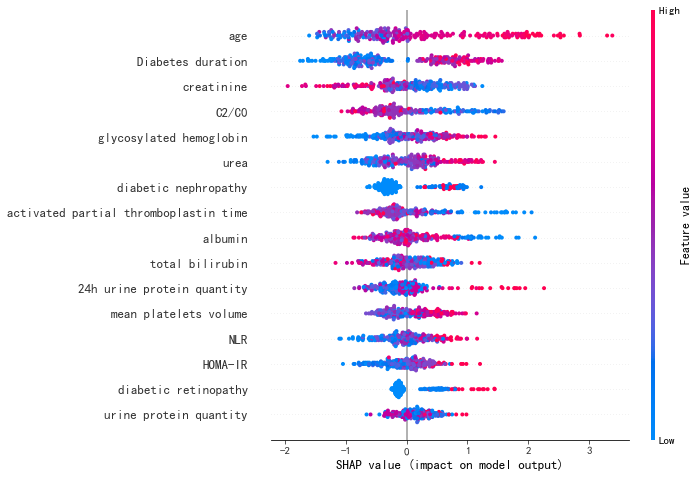

In [13]:
explainer = shap.TreeExplainer(clf_xgb)
shap_values_XGBoost_test = explainer.shap_values(test_X_selected)
print(shap_values_XGBoost_test.shape,test_X_selected.shape)
shap.summary_plot(shap_values_XGBoost_test, test_X_selected)

#### Confusion matrix

Text(0.5, 1.0, 'XGBoost')

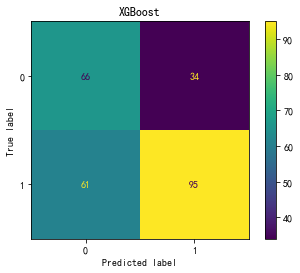

In [14]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_xgb_pred = clf_xgb.predict_proba(test_X_selected)[:,1]
xgb_fpr,xgb_tpr,_ = roc_curve(dpn_test_y,clf_xgb_pred)
plot_confusion_matrix(clf_xgb,test_X_selected,dpn_test_y)
plt.title('XGBoost')

#### ROC 曲线

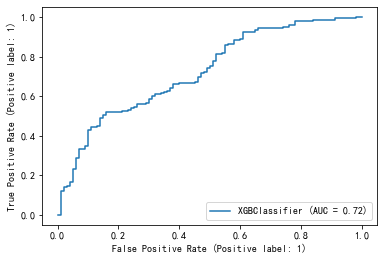

In [15]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
xgb_score = round(roc_auc_score(dpn_test_y,clf_xgb_pred),3)
plot_roc_curve(clf_xgb,test_X_selected,dpn_test_y)

### SVM

In [16]:
TRAIN_SVC = True
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
def objective(trial):
    param = {
        'random_state':43,
        'C':trial.suggest_float('C',1e-5,1,log=True),
        'gamma':trial.suggest_float('gamma',1e-8,1,log=True),
        'probability':True
    }
    model = SVC(**param)
    valid_score = cross_val_score(model,train_X_resampled,train_y_resampled,cv=3,scoring='accuracy')
    return np.mean(valid_score)
Accuracy = []
Precision = []
Recall = []
F1 = []
study = optuna.create_study(direction="maximize")
if TRAIN_SVC:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

KeyboardInterrupt: 

In [ ]:
fixed_params = {'C': 0.9899203552790449, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.8098439704037791, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 43, 'shrinking': True, 'tol': 0.001, 'verbose': False}
if TRAIN_SVC:
    clf_svc = SVC(**study.best_params,probability=True,random_state=43)
else:
    clf_svc = SVC(**fixed_params)
logger.warning(clf_svc.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_svc.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_svc.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'验证集:accuracy\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'验证集:precision\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'验证集:recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'验证集:f1\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'SVC_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-28 14:50:32.238 | WARNING  | __main__:<module>:6 - {'C': 0.9747472700071718, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.4828829369278085, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 43, 'shrinking': True, 'tol': 0.001, 'verbose': False}
2022-11-28 14:50:32.517 | WARNING  | __main__:<module>:19 - 0.807	0.761	0.895	0.823
2022-11-28 14:50:32.787 | WARNING  | __main__:<module>:19 - 0.746	0.706	0.842	0.768
2022-11-28 14:50:33.053 | WARNING  | __main__:<module>:19 - 0.754	0.71	0.86	0.778
2022-11-28 14:50:33.319 | WARNING  | __main__:<module>:19 - 0.807	0.769	0.877	0.82
2022-11-28 14:50:33.583 | WARNING  | __main__:<module>:19 - 0.728	0.681	0.86	0.76
2022-11-28 14:50:33.857 | WARNING  | __main__:<module>:19 - 0.781	0.758	0.825	0.79
2022-11-28 14:50:34.132 | WARNING  | __main__:<module>:19 - 0.754	0.73	0.807	0.767
2022-11-28 14:50:34.400 | WARNING  | __main__:<module>:19

#### 测试集结果

In [ ]:
clf_svc.fit(train_X_resampled,train_y_resampled)
svc_preds = clf_svc.predict(test_X_selected)
logger.info(f'测试集指标:{round(accuracy_score(dpn_test_y,svc_preds),3)}\t{round(precision_score(dpn_test_y,svc_preds),3)}\t\
{round(recall_score(dpn_test_y,svc_preds),3)}\t{round(f1_score(dpn_test_y,svc_preds),3)}')

2022-11-28 14:50:35.343 | INFO     | __main__:<module>:3 - 测试集指标:0.664	0.648	0.919	0.76


#### SHAP

100%|██████████| 256/256 [01:05<00:00,  3.91it/s]


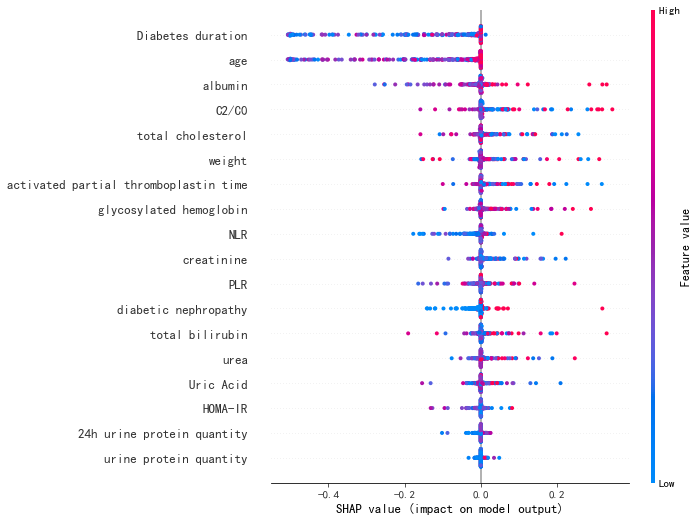

In [ ]:
explainer = shap.KernelExplainer(clf_svc.predict,shap.sample(train_X_resampled, 1,random_state=43))
shap_values_SVC_test = explainer.shap_values(test_X_selected)
shap.summary_plot(shap_values_SVC_test, test_X_selected)

#### Confusion maxtrix

Text(0.5, 1.0, 'SVM')

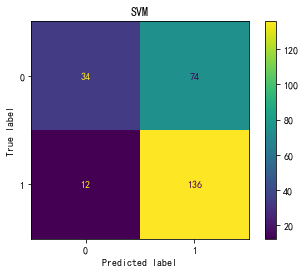

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_svc_pred = clf_svc.predict_proba(test_X_selected)[:,1]
svc_fpr,svc_tpr,_ = roc_curve(dpn_test_y,clf_svc_pred)
plot_confusion_matrix(clf_svc,test_X_selected,dpn_test_y)
plt.title('SVM')

#### ROC 曲线

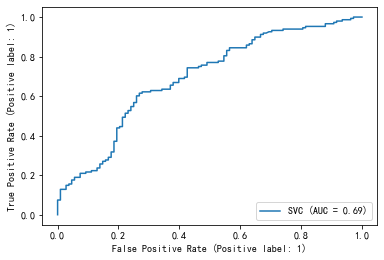

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
svc_score = round(roc_auc_score(dpn_test_y,clf_svc_pred),3)
plot_roc_curve(clf_svc,test_X_selected,dpn_test_y)

### LogisticRegression

In [ ]:
TRAIN_LR = True
from sklearn.linear_model import LogisticRegression
def objective(trial):
    param = {
        'random_state':43,
        'penalty':trial.suggest_categorical("penalty", ['l2','none']),
        'C':trial.suggest_float('C',1e-8,1,log=True),
        'max_iter':trial.suggest_int('max_iter',100,5000)
    }
    model = LogisticRegression(**param)
    valid_score = cross_val_score(model,train_X_resampled,train_y_resampled,cv=3,scoring='accuracy') # 使用训练集
    return np.mean(valid_score)
study = optuna.create_study(direction="maximize")
if TRAIN_LR:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')


2022-11-28 14:51:44.950 | INFO     | __main__:<module>:16 - 调参结束，最佳结果为:0.7047956302365413
2022-11-28 14:51:44.951 | INFO     | __main__:<module>:17 - 调参结束，最佳参数为:{'penalty': 'none', 'C': 0.00038752872779618193, 'max_iter': 586}


In [ ]:
fixed_params = {
    'random_state':43,
    'penalty':'none',
    'C':0.3856279932385604,
    'max_iter':617
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_LR:
    clf_lr = LogisticRegression(**study.best_params)
else:
    clf_lr = LogisticRegression(**fixed_params)
logger.warning(clf_lr.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_lr.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_lr.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'验证集:accuracy\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'验证集:precision\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'验证集:recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'验证集:f1\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(accuracy, 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'LR_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-28 14:51:45.010 | WARNING  | __main__:<module>:15 - {'C': 0.00038752872779618193, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 586, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
2022-11-28 14:51:45.026 | WARNING  | __main__:<module>:28 - 0.728	0.724	0.737	0.73
2022-11-28 14:51:45.038 | WARNING  | __main__:<module>:28 - 0.658	0.65	0.684	0.667
2022-11-28 14:51:45.052 | WARNING  | __main__:<module>:28 - 0.684	0.706	0.632	0.667
2022-11-28 14:51:45.066 | WARNING  | __main__:<module>:28 - 0.684	0.698	0.649	0.673
2022-11-28 14:51:45.081 | WARNING  | __main__:<module>:28 - 0.728	0.724	0.737	0.73
2022-11-28 14:51:45.096 | WARNING  | __main__:<module>:28 - 0.667	0.673	0.649	0.661
2022-11-28 14:51:45.109 | WARNING  | __main__:<module>:28 - 0.667	0.667	0.667	0.667
2022-11-28 14:51:45.121 | WARNING  | __main__:<module>:28

#### 测试集结果

In [ ]:
clf_lr.fit(train_X_resampled,train_y_resampled)
lr_preds = clf_lr.predict(test_X_selected)
logger.info(f'测试集指标:{round(accuracy_score(dpn_test_y,lr_preds),3)}\t{round(precision_score(dpn_test_y,lr_preds),3)}\t\
{round(recall_score(dpn_test_y,lr_preds),3)}\t{round(f1_score(dpn_test_y,lr_preds),3)}')

2022-11-28 14:51:45.194 | INFO     | __main__:<module>:3 - 测试集指标:0.699	0.763	0.696	0.728


#### Confusion matrix

Text(0.5, 1.0, 'LR')

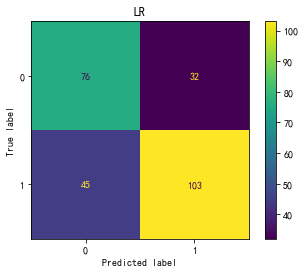

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_lr_pred = clf_lr.predict_proba(test_X_selected)[:,1]
lr_fpr,lr_tpr,_ = roc_curve(dpn_test_y,clf_lr_pred)
plot_confusion_matrix(clf_lr,test_X_selected,dpn_test_y)
plt.title('LR')

#### ROC曲线

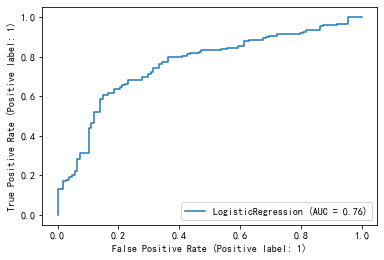

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
lr_score = round(roc_auc_score(dpn_test_y,clf_lr_pred),3)
plot_roc_curve(clf_lr,test_X_selected,dpn_test_y)

### RandomForest

In [ ]:
TRAIN_RF = True
from sklearn.ensemble import RandomForestClassifier
def objective(trial):
    param = {
        'n_estimators':trial.suggest_int('n_estimators',200,500),
        'max_depth': trial.suggest_int("max_depth", 2, 16, step=2),
        'min_samples_split':trial.suggest_int("min_samples_split", 2, 10, step=1),
        'random_state':43,
    }
    clf_rf = RandomForestClassifier(**param)
    valid_score = np.mean(cross_val_score(clf_rf, train_X_resampled, train_y_resampled, cv=3,scoring='accuracy'))
    return np.mean(valid_score)
Accuracy = []
Precision = []
Recall = []
F1 = []
study = optuna.create_study(direction="maximize")
if TRAIN_RF:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

2022-11-28 14:53:58.502 | INFO     | __main__:<module>:20 - 调参结束，最佳结果为:0.7294148960792483
2022-11-28 14:53:58.503 | INFO     | __main__:<module>:21 - 调参结束，最佳参数为:{'n_estimators': 207, 'max_depth': 14, 'min_samples_split': 3}


In [ ]:
fixed_params = {
    'n_estimators':487,
    'max_depth': 10,
    'min_samples_split': 7,
    'random_state':43,
}
if TRAIN_RF:
    clf_rf = RandomForestClassifier(**study.best_params,random_state=43)
else:
    clf_rf = RandomForestClassifier(**fixed_params)
logger.warning(model.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_rf.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_rf.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'验证集:accuracy\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'验证集:precision\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'验证集:recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'验证集:f1\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/model/'+'rf_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-28 14:53:58.605 | WARNING  | __main__:<module>:11 - {'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 200, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 43, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(max_depth=7, n_estimators=200, random_state=43), 'importance_getter': 'auto', 'max_features': None, 'norm_order': 1, 'prefit': True, 'threshold': None}
2022-11-28 14:53:59.069 | WARNING  | __main__:<module>:24 - 0.754	0.796	0.684	0.736
2022-11-28 14:53:59.519 | WARNING  | __main

#### 测试集结果

In [ ]:
clf_rf.fit(train_X_resampled,train_y_resampled)
rf_preds = clf_rf.predict(test_X_selected)
logger.info(f'测试集 accuracy={round(accuracy_score(dpn_test_y,rf_preds),3)}\tprecision={round(precision_score(dpn_test_y,rf_preds),3)}\t\
recall={round(recall_score(dpn_test_y,rf_preds),3)}\tf1={round(f1_score(dpn_test_y,rf_preds),3)}')

2022-11-28 14:54:03.680 | INFO     | __main__:<module>:3 - 测试集 accuracy=0.715	precision=0.736	recall=0.791	f1=0.762


#### SHAP

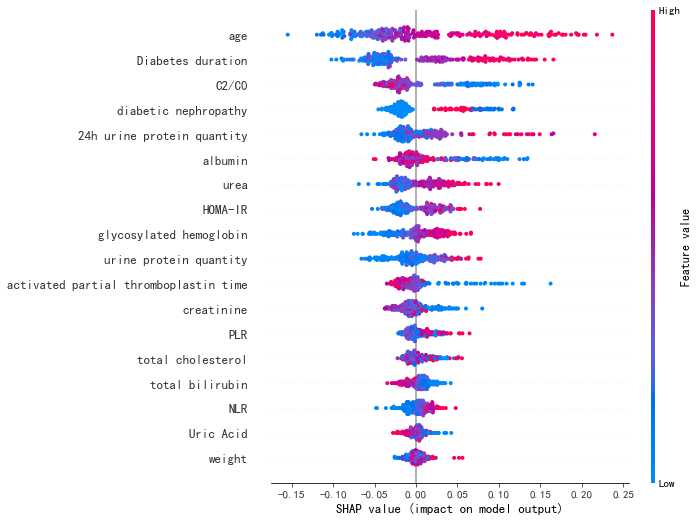

In [ ]:
explainer = shap.TreeExplainer(clf_rf)
shap_values_rf_test = explainer.shap_values(test_X_selected)
shap.summary_plot(shap_values_rf_test[1], test_X_selected)

#### Confusion matrix

Text(0.5, 1.0, 'RF')

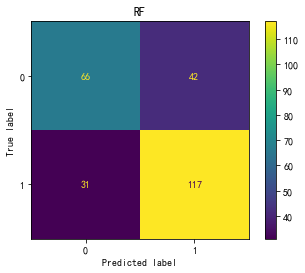

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_rf.fit(train_X_resampled,train_y_resampled)
clf_rf_pred = clf_rf.predict_proba(test_X_selected)[:,1]
rf_fpr,rf_tpr,_ = roc_curve(dpn_test_y,clf_rf_pred)
plot_confusion_matrix(clf_rf,test_X_selected,dpn_test_y)
plt.title('RF')

#### ROC 曲线

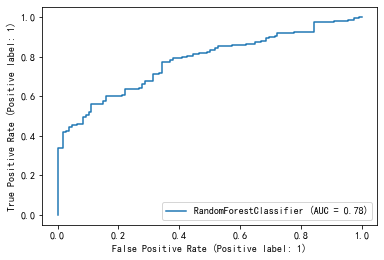

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
rf_score = round(roc_auc_score(dpn_test_y,clf_rf_pred),3)
plot_roc_curve(clf_rf,test_X_selected,dpn_test_y)

### Decision Tree

In [ ]:
TRAIN_DT = True
from sklearn.tree import DecisionTreeClassifier
def objective(trial):
    param = {
        'random_state':43,
        'criterion':trial.suggest_categorical("criterion", ['gini','entropy']),
        'max_depth':trial.suggest_int('max_depth',8,18)
    }
    clf_dt = DecisionTreeClassifier(**param)
    valid_score = np.mean(cross_val_score(clf_dt, train_X_resampled, train_y_resampled, cv=3,scoring='accuracy'))
    return np.mean(valid_score)
study = optuna.create_study(direction="maximize")
if TRAIN_DT:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

2022-11-28 14:54:11.073 | INFO     | __main__:<module>:15 - 调参结束，最佳结果为:0.6450492987085127
2022-11-28 14:54:11.074 | INFO     | __main__:<module>:16 - 调参结束，最佳参数为:{'criterion': 'entropy', 'max_depth': 9}


In [ ]:
fixed_params = {
    'random_state':43,
    'criterion':'entropy',
    'max_depth':16
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_DT:
    clf_dt = DecisionTreeClassifier(**study.best_params,random_state=43)
else:
    clf_dt = DecisionTreeClassifier(**fixed_params)
logger.warning(clf_dt.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_dt.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_dt.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'验证集:accuracy\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'验证集:precision\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'验证集:recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'验证集:f1\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(accuracy, 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'DT_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-28 14:54:11.133 | WARNING  | __main__:<module>:14 - {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 43, 'splitter': 'best'}
2022-11-28 14:54:11.153 | WARNING  | __main__:<module>:27 - 0.702	0.689	0.737	0.712
2022-11-28 14:54:11.174 | WARNING  | __main__:<module>:27 - 0.649	0.673	0.579	0.623
2022-11-28 14:54:11.194 | WARNING  | __main__:<module>:27 - 0.614	0.659	0.474	0.551
2022-11-28 14:54:11.213 | WARNING  | __main__:<module>:27 - 0.693	0.712	0.649	0.679
2022-11-28 14:54:11.232 | WARNING  | __main__:<module>:27 - 0.772	0.86	0.649	0.74
2022-11-28 14:54:11.252 | WARNING  | __main__:<module>:27 - 0.693	0.75	0.579	0.653
2022-11-28 14:54:11.271 | WARNING  | __main__:<module>:27 - 0.684	0.723	0.596	0.654
2022-11-28 14:54:11.291 | WARNING  | __main__:<mod

#### 测试集结果

In [ ]:
clf_dt.fit(train_X_resampled,train_y_resampled)
dt_preds = clf_dt.predict(test_X_selected)
logger.info(f'测试集指标:{round(accuracy_score(dpn_test_y,dt_preds),3)}\t{round(precision_score(dpn_test_y,dt_preds),3)}\t\
{round(recall_score(dpn_test_y,dt_preds),3)}\t{round(f1_score(dpn_test_y,dt_preds),3)}')

2022-11-28 14:54:11.411 | INFO     | __main__:<module>:3 - 测试集指标:0.625	0.676	0.676	0.676


#### Confusion matrix

Text(0.5, 1.0, 'DT')

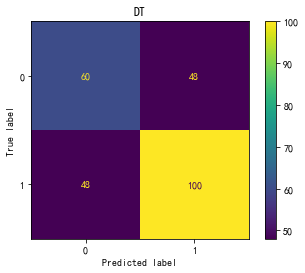

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_dt_pred = clf_dt.predict_proba(test_X_selected)[:,1]
dt_fpr,dt_tpr,_ = roc_curve(dpn_test_y,clf_dt_pred)
plot_confusion_matrix(clf_dt,test_X_selected,dpn_test_y)
plt.title('DT')

#### ROC曲线

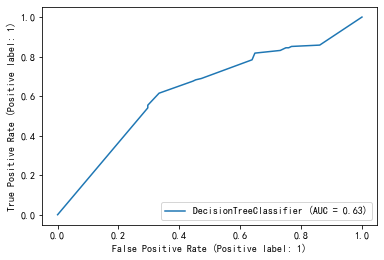

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
dt_score = round(roc_auc_score(dpn_test_y,clf_dt_pred),3)
plot_roc_curve(clf_dt,test_X_selected,dpn_test_y)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy = []
Precision = []
Recall = []
F1 = []
clf_knn = KNeighborsClassifier(n_neighbors=2)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_knn.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_knn.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'KNN_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-28 14:54:11.811 | WARNING  | __main__:<module>:19 - 0.711	0.9	0.474	0.621
2022-11-28 14:54:11.824 | WARNING  | __main__:<module>:19 - 0.702	0.848	0.491	0.622
2022-11-28 14:54:11.838 | WARNING  | __main__:<module>:19 - 0.711	0.9	0.474	0.621
2022-11-28 14:54:11.853 | WARNING  | __main__:<module>:19 - 0.684	0.889	0.421	0.571
2022-11-28 14:54:11.866 | WARNING  | __main__:<module>:19 - 0.746	0.889	0.561	0.688
2022-11-28 14:54:11.880 | WARNING  | __main__:<module>:19 - 0.667	0.852	0.404	0.548
2022-11-28 14:54:11.893 | WARNING  | __main__:<module>:19 - 0.588	0.727	0.281	0.405
2022-11-28 14:54:11.904 | WARNING  | __main__:<module>:19 - 0.649	0.87	0.351	0.5
2022-11-28 14:54:11.914 | WARNING  | __main__:<module>:19 - 0.673	1.0	0.339	0.507
2022-11-28 14:54:11.924 | WARNING  | __main__:<module>:19 - 0.69	0.824	0.491	0.615
2022-11-28 14:54:11.925 | WARNING  | __main__:<module>:21 - accuracy		mean:0.682	std:0.041
2022-11-28 14:54:11.926 | WARNING  | __main__:<module>:22 - precision		mean:0.8

#### 测试集结果

In [ ]:
clf_knn.fit(train_X_resampled,train_y_resampled)
knn_preds = clf_knn.predict(test_X_selected)
logger.info(f'测试集指标:{round(accuracy_score(dpn_test_y,knn_preds),3)}\t{round(precision_score(dpn_test_y,knn_preds),3)}\t\
{round(recall_score(dpn_test_y,knn_preds),3)}\t{round(f1_score(dpn_test_y,knn_preds),3)}')

2022-11-28 14:54:12.001 | INFO     | __main__:<module>:3 - 测试集指标:0.586	0.769	0.405	0.531


#### Confusion matrix

Text(0.5, 1.0, 'KNN')

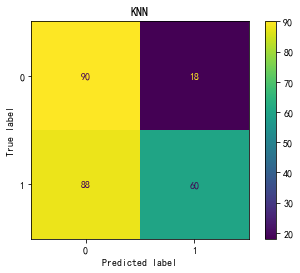

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_knn_pred = clf_knn.predict_proba(test_X_selected)[:,1]
knn_fpr,knn_tpr,_ = roc_curve(dpn_test_y,clf_knn_pred)
plot_confusion_matrix(clf_knn,test_X_selected,dpn_test_y)
plt.title('KNN')

#### ROC 曲线

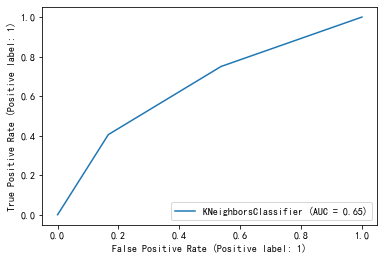

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
knn_score = round(roc_auc_score(dpn_test_y,clf_knn_pred),3)
plot_roc_curve(clf_knn,test_X_selected,dpn_test_y)

### NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
Accuracy = []
Precision = []
Recall = []
F1 = []
clf_nb = GaussianNB()
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(train_X_resampled,train_y_resampled):
    clf_nb.fit(train_X_resampled.loc[train_index], train_y_resampled[train_index])
    preds = clf_nb.predict(train_X_resampled.loc[test_index])
    accuracy = accuracy_score(train_y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(train_y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(train_y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(train_y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'KNN_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-28 14:54:12.431 | WARNING  | __main__:<module>:19 - 0.658	0.909	0.351	0.506
2022-11-28 14:54:12.439 | WARNING  | __main__:<module>:19 - 0.605	0.731	0.333	0.458
2022-11-28 14:54:12.449 | WARNING  | __main__:<module>:19 - 0.561	0.667	0.246	0.359
2022-11-28 14:54:12.459 | WARNING  | __main__:<module>:19 - 0.561	0.733	0.193	0.306
2022-11-28 14:54:12.469 | WARNING  | __main__:<module>:19 - 0.623	0.792	0.333	0.469
2022-11-28 14:54:12.477 | WARNING  | __main__:<module>:19 - 0.588	0.857	0.211	0.338
2022-11-28 14:54:12.484 | WARNING  | __main__:<module>:19 - 0.632	0.759	0.386	0.512
2022-11-28 14:54:12.492 | WARNING  | __main__:<module>:19 - 0.561	0.706	0.211	0.324
2022-11-28 14:54:12.501 | WARNING  | __main__:<module>:19 - 0.593	0.812	0.232	0.361
2022-11-28 14:54:12.509 | WARNING  | __main__:<module>:19 - 0.584	0.727	0.281	0.405
2022-11-28 14:54:12.510 | WARNING  | __main__:<module>:21 - accuracy		mean:0.597	std:0.031
2022-11-28 14:54:12.511 | WARNING  | __main__:<module>:22 - precision

#### 测试集结果

In [ ]:
clf_nb.fit(train_X_resampled,train_y_resampled)
nb_preds = clf_knn.predict(test_X_selected)
logger.info(f'测试集指标:{round(accuracy_score(dpn_test_y,nb_preds),3)}\t{round(precision_score(dpn_test_y,nb_preds),3)}\t\
{round(recall_score(dpn_test_y,nb_preds),3)}\t{round(f1_score(dpn_test_y,nb_preds),3)}')

2022-11-28 14:54:12.574 | INFO     | __main__:<module>:3 - 测试集指标:0.586	0.769	0.405	0.531


#### Confusion matrix

Text(0.5, 1.0, 'NB')

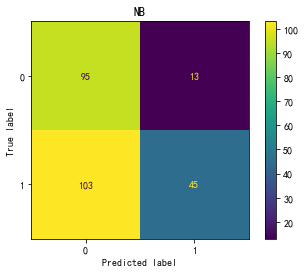

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_nb_pred = clf_nb.predict_proba(test_X_selected)[:,1]
nb_fpr,nb_tpr,_ = roc_curve(dpn_test_y,clf_nb_pred)
plot_confusion_matrix(clf_nb,test_X_selected,dpn_test_y)
plt.title('NB')

#### ROC曲线

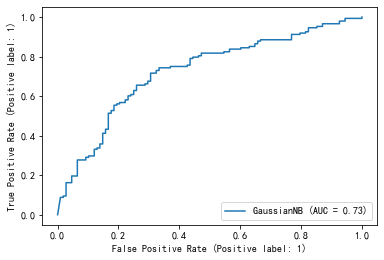

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
nb_score = round(roc_auc_score(dpn_test_y,clf_nb_pred),3)
plot_roc_curve(clf_nb,test_X_selected,dpn_test_y)

## 实验结果

#### ROC曲线

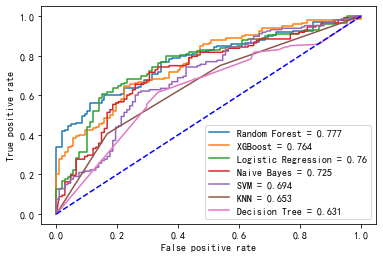

In [ ]:
import matplotlib.pyplot as plt
auc_score = {
    'XGBoost':[xgb_fpr,xgb_tpr,xgb_score],
    'SVM':[svc_fpr,svc_tpr,svc_score],
    'Logistic Regression':[lr_fpr,lr_tpr,lr_score],
    'Random Forest':[rf_fpr,rf_tpr,rf_score],
    'KNN':[knn_fpr,knn_tpr,knn_score],
    'Decision Tree':[dt_fpr,dt_tpr,dt_score],
    'Naive Bayes':[nb_fpr,nb_tpr,nb_score]
}
auc_score = sorted(auc_score.items(),key=lambda x:x[1][2],reverse=True)

for name,value in auc_score:
    plt.plot(value[0],value[1],label=f'{name} = {value[2]}')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()